# Finding Adult Income -Decision Tree

----
## Introduction

In this project, you will employ several supervised algorithms to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data.

Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income).

----
## Importing libraries

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
#from scikitplot.metrics import plot_confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

from sklearn.base import clone

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# for one hot encoding with sklearn
from sklearn.preprocessing import OneHotEncoder

In [2]:
file_path="data/adult.csv"
data=pd.read_csv(file_path,na_values="?")
data=pd.read_csv('../input/adult-income-dataset/adult.csv',,na_values="?")
#data = pd.read_csv("E:\Machine Learning\Applied Data Science & AI\Day4\census.csv")
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


## Featureset Description 



* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **gender**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

## Exploratory Data Analysis
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000.
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

**secondly,** I showed distribution of numerical features

**Third,** I showed distribution of categorical features

**Fourth,** I showed distribution of categorical features across income



In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
# There are missing values in workclass,occupation,native country

### Showing percentage of labels for output

In [5]:
# Total number of records
n_records = len(data)

# Number of records where individual's income is more than $50,000
n_greater_50k = len(data[data["income"]==">50K"])

# Number of records where individual's income is at most $50,000
n_less_50k = len(data[data["income"]=="<=50K"])

# Percentage of individuals whose income is more than $50,000
greater_percent = round((n_greater_50k/n_records)*100)

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at less than $50,000: {}".format(n_less_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 48842
Individuals making more than $50,000: 11687
Individuals making at less than $50,000: 37155
Percentage of individuals making more than $50,000: 24%


### Distribution of Numerical Data

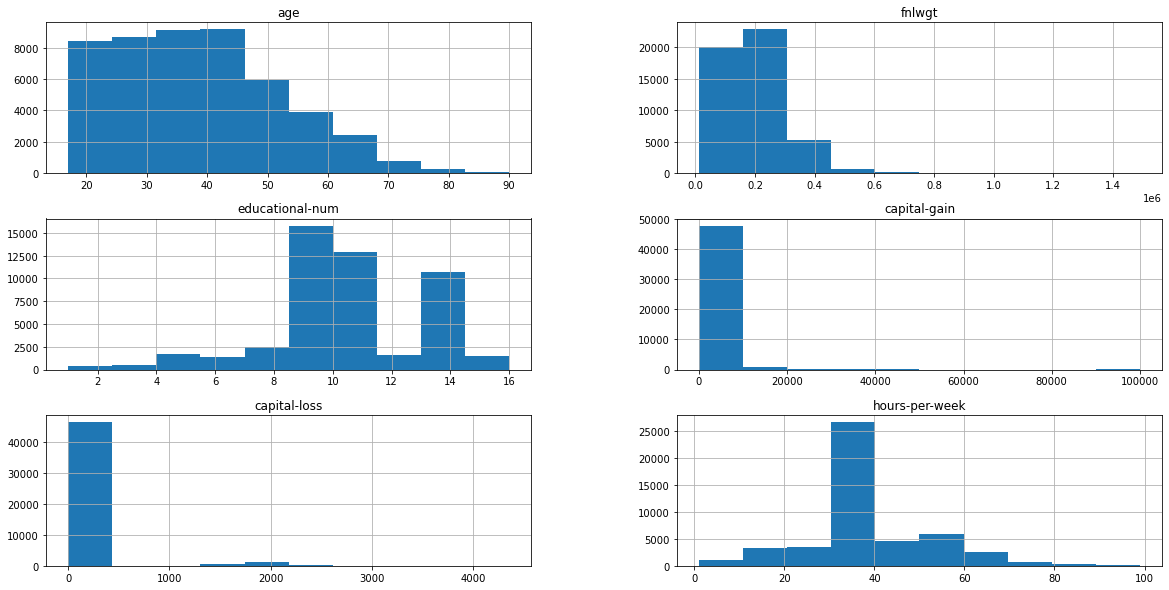

In [6]:
data.hist(figsize=(20,10))
plt.show()

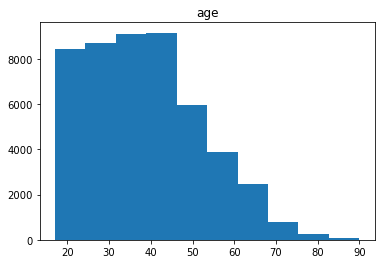

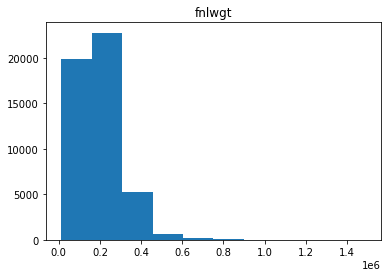

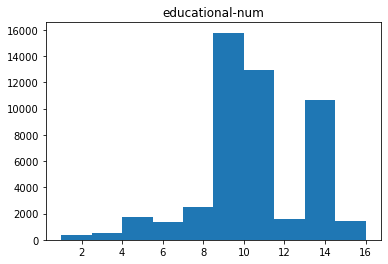

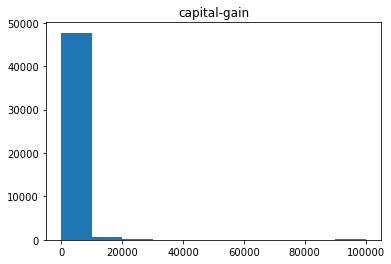

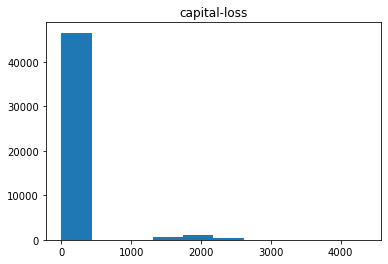

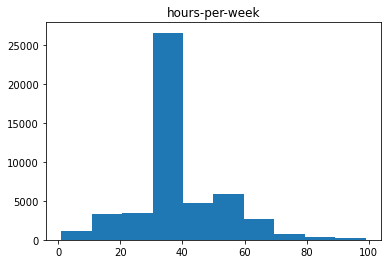

In [7]:
num_feature = data.columns[data.dtypes!='object']

def my_plot(feature):
    plt.hist(data[feature])
    plt.title(feature)
    plt.show()
        
for i in num_feature:
    my_plot(i)

In [8]:
# capital gain and capital loss have high skewness

In [9]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

### showing the count across categorical columns

In [10]:
cat_cols=data.select_dtypes(include="object").columns
for i in cat_cols:
    print(i)
    print(data[i].value_counts())
    print("-------------------")

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
-------------------
education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64
-------------------
marital-status
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64
-------------------
occupation
Prof-specialty       6

In [11]:
cat_cols

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country', 'income'],
      dtype='object')

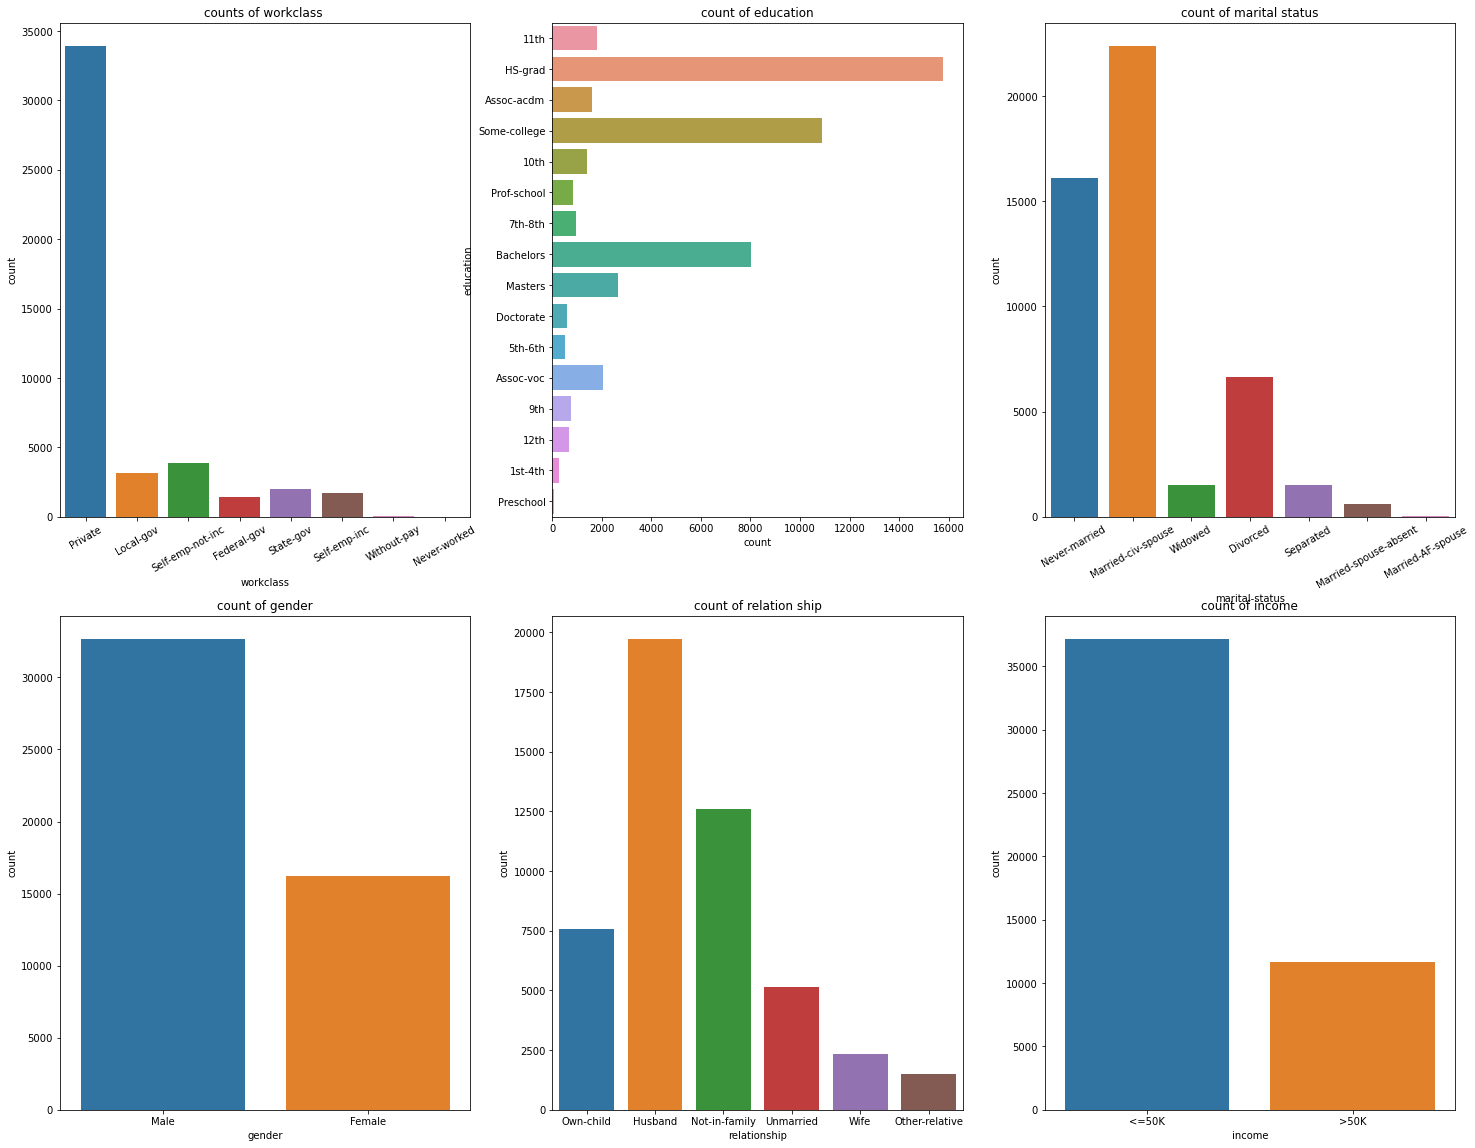

In [12]:
fig, ax = plt.subplots(2, 3, figsize=(25, 20))
sns.countplot(x='workclass',data=data,ax=ax[0][0])
#sns.boxplot(y=data["Number of rented bikes"],ax=ax[0][0])
ax[0][0].set_title("counts of workclass ")
ax[0][0].tick_params(axis='x', rotation=30)
sns.countplot(y='education',data=data,ax=ax[0][1])
ax[0][1].set_title("count of education")
#ax[0][1].tick_params(axis='x', rotation=30)
sns.countplot(x='marital-status',data=data,ax=ax[0][2])
ax[0][2].set_title("count of marital status")
ax[0][2].tick_params(axis='x', rotation=30)
sns.countplot(x='gender',data=data,ax=ax[1][0])
ax[1][0].set_title("count of gender")
sns.countplot(x='relationship',data=data,ax=ax[1][1])
ax[1][1].set_title("count of relation ship")
sns.countplot(x='income',data=data,ax=ax[1][2])
ax[1][2].set_title("count of income");

### Showing Distribution of categorical features across income

#### showing distribution of income across gender

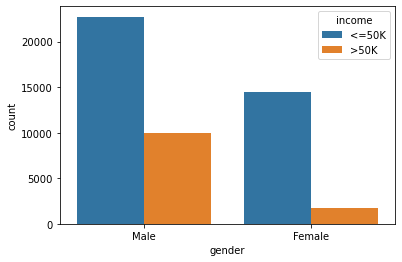

In [13]:

sns.countplot(x="gender",data=data,hue="income");

#### showing distribution of income across workclass

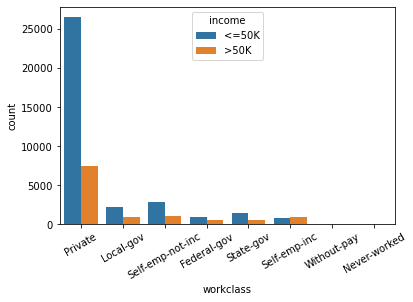

In [14]:

fig, ax = plt.subplots()
sns.countplot(x="workclass",data=data,hue="income");
ax.tick_params(axis='x', rotation=30)

#### showing distribution of race across income

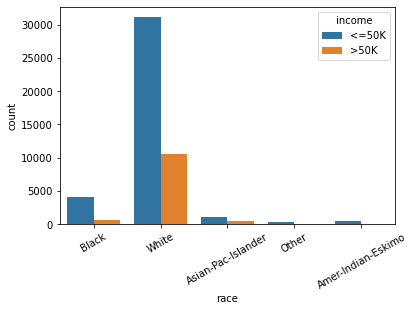

In [15]:

fig, ax = plt.subplots()
sns.countplot(x="race",data=data,hue="income");
ax.tick_params(axis='x', rotation=30)

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. unFortunately, for this dataset, there are  invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Dropping Not Important Columns

In [16]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

I chose to drop the following columns for following reasons:

**1)fnlwgt:** not important information <br>
**2)education:** the information it holds is already contained within education-num <br>
**3)relationship:** we have already marital-status

In [17]:
data.drop(["fnlwgt","education","relationship"],axis=1,inplace=True)

### Missing Values

In [18]:
data_na = data.isnull().sum() 
data_na  = data_na .drop(data_na [data_na  == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :data_na })
missing_data.head(20)

,Missing Ratio
occupation,2809
workclass,2799
native-country,857


Text(0.5, 1.0, 'countt missing data by feature')

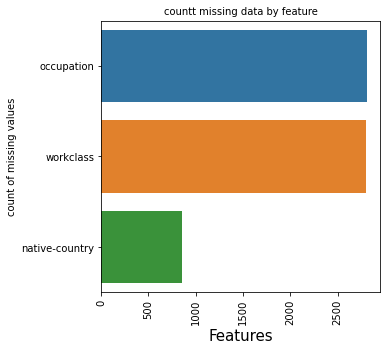

In [19]:

f, ax = plt.subplots(figsize=(5, 5))
plt.xticks(rotation='90')
sns.barplot(y=data_na.index, x=data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('count of missing values', fontsize=10)
plt.title('countt missing data by feature', fontsize=10)

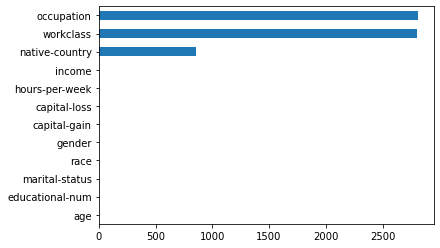

In [20]:
data.isna().sum().sort_values(ascending=True).plot(kind="barh");



### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized.

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

In [21]:
data['capital-gain_log'] = np.log((data['capital-gain'])+1)
data['capital-loss_log'] = np.log((data['capital-loss'])+1)

In [22]:
data.head()

,age,workclass,educational-num,marital-status,occupation,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,capital-gain_log,capital-loss_log
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,0,0,40,United-States,<=50K,0.000000,0.0
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,0,0,50,United-States,<=50K,0.000000,0.0
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,0,0,40,United-States,>50K,0.000000,0.0
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,7688,0,40,United-States,>50K,8.947546,0.0
4,18,NaN,10,Never-married,NaN,White,Female,0,0,30,United-States,<=50K,0.000000,0.0


In [23]:
data_log_transformed = data.drop(['capital-gain', 'capital-loss'], axis=1)
data_log_transformed.head()

,age,workclass,educational-num,marital-status,occupation,race,gender,hours-per-week,native-country,income,capital-gain_log,capital-loss_log
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,40,United-States,<=50K,0.000000,0.0
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,50,United-States,<=50K,0.000000,0.0
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,40,United-States,>50K,0.000000,0.0
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,40,United-States,>50K,8.947546,0.0
4,18,NaN,10,Never-married,NaN,White,Female,30,United-States,<=50K,0.000000,0.0


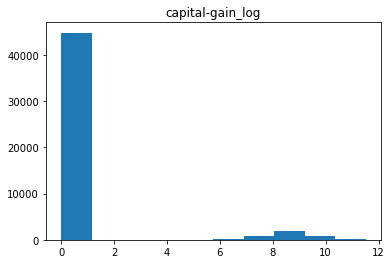

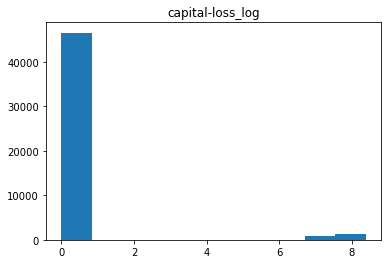

In [24]:
for i in ['capital-gain_log', 'capital-loss_log']:
    my_plot(i)

### replacing labels by 1 and 0

In [25]:
# Encode the 'income_label' data to numerical values
data_log_transformed['income'].replace({"<=50K":0, ">50K":1}, inplace=True)
data_log_transformed.head()

,age,workclass,educational-num,marital-status,occupation,race,gender,hours-per-week,native-country,income,capital-gain_log,capital-loss_log
0,25,Private,7,Never-married,Machine-op-inspct,Black,Male,40,United-States,0,0.000000,0.0
1,38,Private,9,Married-civ-spouse,Farming-fishing,White,Male,50,United-States,0,0.000000,0.0
2,28,Local-gov,12,Married-civ-spouse,Protective-serv,White,Male,40,United-States,1,0.000000,0.0
3,44,Private,10,Married-civ-spouse,Machine-op-inspct,Black,Male,40,United-States,1,8.947546,0.0
4,18,NaN,10,Never-married,NaN,White,Female,30,United-States,0,0.000000,0.0


### high Crdinality for some categorical variables

High cardinality may pose the following problems: 

- Variables with too many labels tend to dominate over those with only a few labels, particularly in **Tree based** algorithms.

- A big number of labels within a variable may introduce noise with little, if any, information, therefore making machine learning models prone to over-fit.

- Some of the labels may only be present in the training data set, but not in the test set, therefore machine learning algorithms may over-fit to the training set.

- Contrarily, some labels may appear only in the test set, therefore leaving the machine learning algorithms unable to perform a calculation over the new (unseen) observation.

In [26]:
cat_cols=list(data_log_transformed.select_dtypes(include="object").columns)

In [27]:
for col in cat_cols:
    print('variable: ', col, ' number of labels: ', data_log_transformed[col].nunique())

variable:  workclass  number of labels:  8
variable:  marital-status  number of labels:  7
variable:  occupation  number of labels:  14
variable:  race  number of labels:  5
variable:  gender  number of labels:  2
variable:  native-country  number of labels:  41


There is high cardinality in the following variables:
    * occupation    <br>
    * native-country <br>
    * work-class <br>
    * marital_status <br>

In [28]:
data_log_transformed["native-country"].value_counts()  # starting from japan to the end under "other category"

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador                     

Private             0.694198
Self-emp-not-inc    0.079071
Local-gov           0.064207
State-gov           0.040559
Self-emp-inc        0.034704
Federal-gov         0.029319
Without-pay         0.000430
Never-worked        0.000205
Name: workclass, dtype: float64


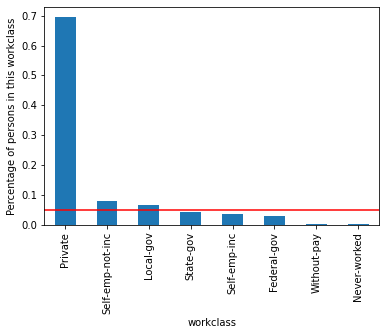

Married-civ-spouse       0.458192
Never-married            0.329982
Divorced                 0.135805
Separated                0.031325
Widowed                  0.031080
Married-spouse-absent    0.012858
Married-AF-spouse        0.000758
Name: marital-status, dtype: float64


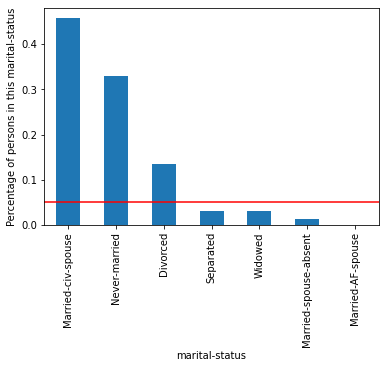

Prof-specialty       0.126367
Craft-repair         0.125138
Exec-managerial      0.124606
Adm-clerical         0.114881
Sales                0.112690
Other-service        0.100794
Machine-op-inspct    0.061873
Transport-moving     0.048217
Handlers-cleaners    0.042423
Farming-fishing      0.030507
Tech-support         0.029606
Protective-serv      0.020126
Priv-house-serv      0.004955
Armed-Forces         0.000307
Name: occupation, dtype: float64


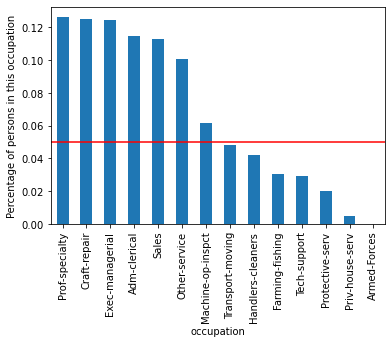

White                 0.855043
Black                 0.095922
Asian-Pac-Islander    0.031100
Amer-Indian-Eskimo    0.009623
Other                 0.008313
Name: race, dtype: float64


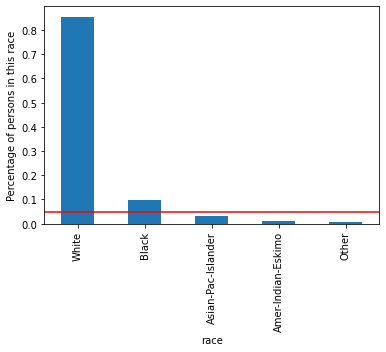

Male      0.668482
Female    0.331518
Name: gender, dtype: float64


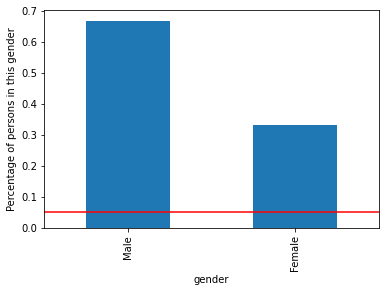

United-States                 0.897424
Mexico                        0.019471
Philippines                   0.006040
Germany                       0.004218
Puerto-Rico                   0.003767
Canada                        0.003726
El-Salvador                   0.003173
India                         0.003092
Cuba                          0.002825
England                       0.002600
China                         0.002498
South                         0.002355
Jamaica                       0.002170
Italy                         0.002150
Dominican-Republic            0.002109
Japan                         0.001884
Guatemala                     0.001802
Poland                        0.001781
Vietnam                       0.001761
Columbia                      0.001740
Haiti                         0.001536
Portugal                      0.001372
Taiwan                        0.001331
Iran                          0.001208
Nicaragua                     0.001003
Greece                   

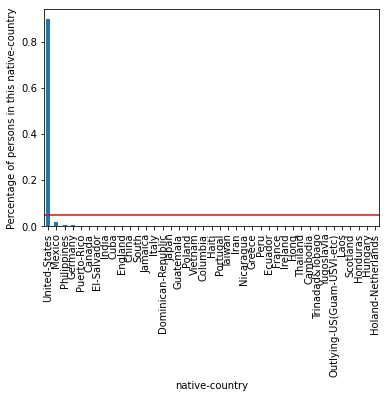

In [29]:
total_data = len(data_log_transformed)

# for each categorical variable
for col in cat_cols:

    # count the number of persons per category
    # and divide by total persons

    # aka percentage of houses per category

    temp_df = pd.Series(data_log_transformed[col].value_counts() / total_data)
    print(temp_df)
    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of persons in this '+col)
    plt.show()

In [30]:
def group_rare_labels(df, var,num):

    total_length = len(df)

    # first I calculate the % of houses for each category
    temp_df = pd.Series(df[var].value_counts() / total_length)

    # now I create a dictionary to replace the rare labels with the
    # string 'rare' if they are present in less than 5% of houses

    grouping_dict = {
        k: ('rare' if k not in temp_df[temp_df >= num].index else k)
        for k in temp_df.index
    }

    # now I replace the rare categories
    tmp = df[var].map(grouping_dict)

    return tmp

In [31]:
cat_cols

['workclass',
 'marital-status',
 'occupation',
 'race',
 'gender',
 'native-country']

In [32]:
data_log_transformed['workclass']=group_rare_labels(data_log_transformed,'workclass',0.02)

In [33]:
data_log_transformed['marital-status']=group_rare_labels(data_log_transformed, 'marital-status',0.03)

In [34]:
data_log_transformed['occupation']=group_rare_labels(data_log_transformed, 'occupation',0.02)

In [35]:
data_log_transformed['native-country']=group_rare_labels(data_log_transformed, 'native-country',0.002)

In [36]:
data_log_transformed['native-country'].value_counts()

United-States         43832
rare                   1213
Mexico                  951
Philippines             295
Germany                 206
Puerto-Rico             184
Canada                  182
El-Salvador             155
India                   151
Cuba                    138
England                 127
China                   122
South                   115
Jamaica                 106
Italy                   105
Dominican-Republic      103
Name: native-country, dtype: int64

### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively.

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [37]:
# Split the data into features and target label
X = data_log_transformed.drop('income', axis=1)
y = data_log_transformed['income']

In [38]:
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 39073 samples.
Testing set has 9769 samples.


In [39]:
cols_to_use=list(X_train.columns)
cols_to_use

['age',
 'workclass',
 'educational-num',
 'marital-status',
 'occupation',
 'race',
 'gender',
 'hours-per-week',
 'native-country',
 'capital-gain_log',
 'capital-loss_log']

In [40]:
cols_to_use=['age','workclass','educational-num','marital-status','occupation','race','gender','hours-per-week',
             'native-country','capital-gain_log','capital-loss_log']

cat_miss=['occupation','workclass','native-country']
ohe_cols=['workclass','marital-status','occupation','race','gender','native-country']

In [41]:
imp=SimpleImputer(strategy='most_frequent')
imp.fit(X_train)
X_train = imp.transform(X_train)
X_test = imp.transform(X_test)

In [42]:
pd.DataFrame(X_train, columns=cols_to_use).head()

,age,workclass,educational-num,marital-status,occupation,race,gender,hours-per-week,native-country,capital-gain_log,capital-loss_log
0,20,Private,10,Never-married,Craft-repair,Black,Female,40,United-States,0.0,0.0
1,42,Private,11,Married-civ-spouse,Craft-repair,White,Male,52,United-States,0.0,0.0
2,35,State-gov,10,Divorced,Tech-support,White,Female,40,United-States,0.0,0.0
3,39,Private,9,Divorced,Craft-repair,White,Female,16,United-States,0.0,0.0
4,24,Private,13,Never-married,Prof-specialty,White,Male,40,United-States,0.0,0.0


In [43]:
X_train=pd.DataFrame(X_train, columns=cols_to_use)

In [44]:
X_test=pd.DataFrame(X_test, columns=cols_to_use)

In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39073 entries, 0 to 39072
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               39073 non-null  object
 1   workclass         39073 non-null  object
 2   educational-num   39073 non-null  object
 3   marital-status    39073 non-null  object
 4   occupation        39073 non-null  object
 5   race              39073 non-null  object
 6   gender            39073 non-null  object
 7   hours-per-week    39073 non-null  object
 8   native-country    39073 non-null  object
 9   capital-gain_log  39073 non-null  object
 10  capital-loss_log  39073 non-null  object
dtypes: object(11)
memory usage: 3.3+ MB


In [46]:
cols_to_conv=['age', 'educational-num','hours-per-week', 'capital-gain_log', 'capital-loss_log']
X_train[cols_to_conv]=X_train[cols_to_conv].astype('int64')
X_test[cols_to_conv]=X_test[cols_to_conv].astype('int64')

In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39073 entries, 0 to 39072
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               39073 non-null  int64 
 1   workclass         39073 non-null  object
 2   educational-num   39073 non-null  int64 
 3   marital-status    39073 non-null  object
 4   occupation        39073 non-null  object
 5   race              39073 non-null  object
 6   gender            39073 non-null  object
 7   hours-per-week    39073 non-null  int64 
 8   native-country    39073 non-null  object
 9   capital-gain_log  39073 non-null  int64 
 10  capital-loss_log  39073 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 3.3+ MB


In [48]:
# One-hot encode the categorical features data
X_train = pd.get_dummies(X_train)
X_test= pd.get_dummies(X_test)

# Print the number of features after one-hot encoding
print("{} total features after one-hot encoding.".format(len(X_train.columns)))
print(X_train.columns)

54 total features after one-hot encoding.
Index(['age', 'educational-num', 'hours-per-week', 'capital-gain_log',
       'capital-loss_log', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Private', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov', 'workclass_rare',
       'marital-status_Divorced', 'marital-status_Married-civ-spouse',
       'marital-status_Never-married', 'marital-status_Separated',
       'marital-status_Widowed', 'marital-status_rare',
       'occupation_Adm-clerical', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'occupation_rare', 'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander',
       'race_Black', 

In [49]:
y_train

22729    0
8650     0
26605    0
15864    0
2516     0
        ..
21243    0
45891    0
42613    1
43567    0
2732     1
Name: income, Length: 39073, dtype: int64

In [50]:
y_train_scaled = y_train.reset_index(drop=True)
y_train_scaled

0        0
1        0
2        0
3        0
4        0
        ..
39068    0
39069    0
39070    1
39071    0
39072    1
Name: income, Length: 39073, dtype: int64

In [51]:
y_test_scaled = y_test.reset_index(drop=True)
y_test_scaled

0       0
1       1
2       1
3       0
4       0
       ..
9764    1
9765    0
9766    0
9767    0
9768    0
Name: income, Length: 9769, dtype: int64

Observation of X_train dataframe before and after Scaling

In [52]:
X_test.head()

,age,educational-num,hours-per-week,capital-gain_log,capital-loss_log,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Germany,native-country_India,native-country_Italy,native-country_Jamaica,native-country_Mexico,native-country_Philippines,native-country_Puerto-Rico,native-country_South,native-country_United-States,native-country_rare
0,36,13,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,57,15,36,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,49,14,45,8,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,54,3,55,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,17,6,24,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [53]:
X_train.head()

,age,educational-num,hours-per-week,capital-gain_log,capital-loss_log,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Germany,native-country_India,native-country_Italy,native-country_Jamaica,native-country_Mexico,native-country_Philippines,native-country_Puerto-Rico,native-country_South,native-country_United-States,native-country_rare
0,20,10,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,42,11,52,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,35,10,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,39,9,16,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,24,13,40,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


----
## Evaluating Model Performance
In this section, we will investigate 3 different algorithms, and determine which is best at modeling the data.



### Note: Recap of Accuracy, Precision, Recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

`[(True Positives + True Negatives)/(True Positives + False Positives)]`

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity) ** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score (we take the harmonic mean as we are dealing with ratios).

###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**

- Decision Trees
- Support Vector Machines (SVM)
- Logistic Regression
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using the training data and perform predictions on the testing data.

In [54]:
def train_predict(classifier): 
    '''
    inputs:
       - classifier: the learning algorithm to be trained and predicted on
    '''
    
    results = {}
    
    # Fit the classifier to the training data and Calculate the time
    start_train = time()
    classifier = classifier.fit(X_train, y_train_scaled)
    end_train = time()
    results['train_time'] = round((end_train-start_train), 2)

    # Predict the training/testing labels and Calculate the time
    start_test = time()
    y_pred_train = classifier.predict(X_train)
    y_pred_test = classifier.predict(X_test)
    end_test = time()   
    results['pred_time'] = round((end_test-start_test), 2)
            
    # Model evaluation (training/testing data) using accuracy
    results['acc_train'] = round(accuracy_score(y_train_scaled, y_pred_train), 2)
    results['acc_test'] = round(accuracy_score(y_test_scaled, y_pred_test), 2)
    
    # Model evaluation (training/testing data) using f1-score
    results['f1_train'] = round(f1_score(y_train_scaled, y_pred_train), 2)
    results['f1_test'] = round(f1_score(y_test_scaled, y_pred_test), 2)
    
    # Display classification_report
    report = classification_report(y_test_scaled, y_pred_test)
       
    
    # Return the results
    return results, report

### Implementation: Initial Model Evaluation

In [55]:
# Initialize the classifiers
clf_DT = DecisionTreeClassifier(random_state=0)
clf_LR = LogisticRegression(random_state=0)
clf_SVM = SVC(random_state=0)
clf_rf = RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=0)
clf_gbc = GradientBoostingClassifier(n_estimators=300, max_depth=5,random_state=0)
clf_adbc = AdaBoostClassifier(n_estimators=500, random_state=0)
clf_list = [clf_DT, clf_LR, clf_SVM,clf_rf,clf_gbc,clf_adbc]

# Compare evaluation of the different classifiers
clf_evaluation = {}
clf_report = {}

for clf in clf_list:
    clf_evaluation[clf.__class__.__name__] = train_predict(clf)[0]
    clf_report[clf.__class__.__name__] = train_predict(clf)[1]

C:\Users\NourhanElaraby\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\NourhanElaraby\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model

In [56]:
clf_evaluation

{'DecisionTreeClassifier': {'train_time': 0.23,
  'pred_time': 0.02,
  'acc_train': 0.97,
  'acc_test': 0.81,
  'f1_train': 0.94,
  'f1_test': 0.59},
 'LogisticRegression': {'train_time': 0.53,
  'pred_time': 0.02,
  'acc_train': 0.84,
  'acc_test': 0.84,
  'f1_train': 0.64,
  'f1_test': 0.64},
 'SVC': {'train_time': 51.1,
  'pred_time': 81.82,
  'acc_train': 0.84,
  'acc_test': 0.84,
  'f1_train': 0.6,
  'f1_test': 0.59},
 'RandomForestClassifier': {'train_time': 10.62,
  'pred_time': 2.89,
  'acc_train': 0.97,
  'acc_test': 0.83,
  'f1_train': 0.94,
  'f1_test': 0.63},
 'GradientBoostingClassifier': {'train_time': 20.26,
  'pred_time': 0.25,
  'acc_train': 0.88,
  'acc_test': 0.86,
  'f1_train': 0.73,
  'f1_test': 0.68},
 'AdaBoostClassifier': {'train_time': 15.2,
  'pred_time': 5.08,
  'acc_train': 0.86,
  'acc_test': 0.86,
  'f1_train': 0.67,
  'f1_test': 0.67}}

In [57]:
for key in clf_report:
    print(key)
    print(clf_report[key])
    print('---------------------------------------------------------')

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.87      0.89      0.88      7420
           1       0.61      0.57      0.59      2349

    accuracy                           0.81      9769
   macro avg       0.74      0.73      0.73      9769
weighted avg       0.80      0.81      0.81      9769

---------------------------------------------------------
LogisticRegression
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      7420
           1       0.71      0.58      0.64      2349

    accuracy                           0.84      9769
   macro avg       0.79      0.75      0.77      9769
weighted avg       0.83      0.84      0.84      9769

---------------------------------------------------------
SVC
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      7420
           1       0.75      0.48      0.59      2349

    accuracy        

In [58]:
results = pd.DataFrame.from_dict(clf_evaluation)
results

,DecisionTreeClassifier,LogisticRegression,SVC,RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
train_time,0.23,0.53,51.10,10.62,20.26,15.20
pred_time,0.02,0.02,81.82,2.89,0.25,5.08
acc_train,0.97,0.84,0.84,0.97,0.88,0.86
acc_test,0.81,0.84,0.84,0.83,0.86,0.86
f1_train,0.94,0.64,0.60,0.94,0.73,0.67
f1_test,0.59,0.64,0.59,0.63,0.68,0.67
